In [35]:
#импорт библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [36]:
data = pd.read_csv('HR-Employee-Attrition.csv')
hr = data.copy()

In [37]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Параметры:
- Age - возраст
- Attrition - изнуренность/усталость
- BusinessTravel - бизнес-поездки 
- DailyRate - Дневная норма
- Department - Отдел
- Distance From Home - Расстояние от дома
- Education - Образование
- Education Field - Область образования
- Employee Count - Количество сотрудников
- EmployeeNumber - Число работников
- EnvironmentSatisfaction - Окружающая среда
- Gender - Пол
- HourlyRate - Почасовая ставка
- JobInvolvement - Работа
- JobLevel - Уровень работы
- JobRole - Должностная роль
- JobSatisfaction - Удовлетворение от работы
- MaritalStatus - Семейное положение
- MonthlyIncome - Ежемесячный доход
- MonthlyRate - Ежемесячная ставка
- NumCompaniesWorked - Количество компаний 
- Over18 - Более 18
- OverTime - Переработки
- PercentSalaryHike - Повышение процентной заработной платы
- PerformanceRating - рейтинг производительности
- RelationshipSatisfaction - Отношения
- StandardHours - Стандартные часы
- Stock Option Level - Уровень опциона на акции
- TotalWorkingYears - Всего лет работы
- Training Times Last Year - Время тренировок/обучения в прошлом году
- Work Life Balance - Баланс между работой и личной жизнью
- YearsAtCompany - Лет в компании
- YearsInCurrentRole - Годы в текущей должности
- YearsSinceLastPromotion - Годы с момента последнего продвижения
- Years With Curr Manager - Годы с текущим менеджером

In [39]:
#посмотрим на значения итогового параметра
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [40]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=hr['Attrition'], values=hr['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=300, height=300)
fig.show()

Количество данных о сотрудниках с истощением/усталостью меньше по сравнению с сотрудниками, у которых нет истощения/усталости.

In [41]:
#проверим на пустоту
hr.isnull().sum().sum()

0

Пропущенных значений нет 

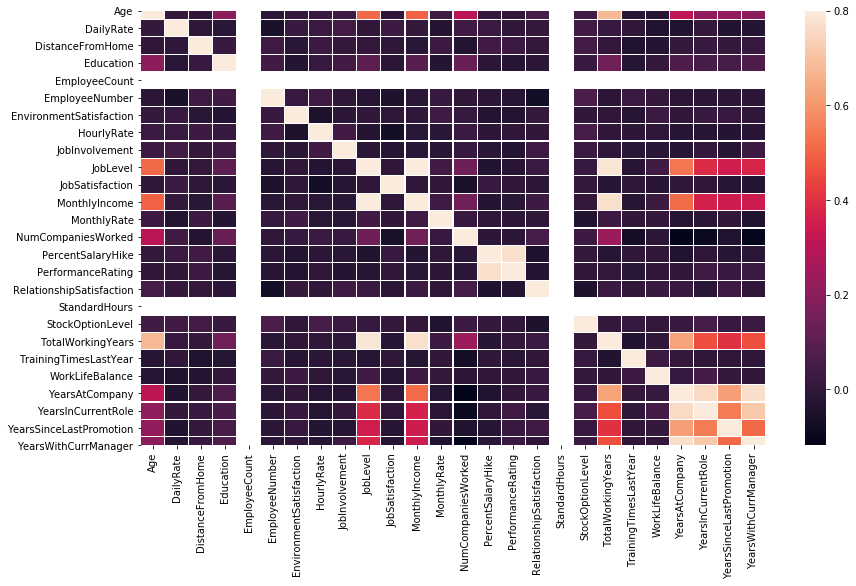

In [42]:
plt.figure(figsize=(14,8))
sns.heatmap(hr.corr(),vmax=0.8,linewidth=0.1)
plt.show()

- TotalWorkingYears имеет положительную связь с JobLevel и MonthlyIncome. 
- YearsAtCompany имеет положительную связь с YearsInCurrentRole и YearsWithCurrentManager.

<b>Категориальные параметры</b>

In [43]:
cat_params = hr.select_dtypes(include=[np.object]).columns
print(cat_params)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [44]:
hr[cat_params].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Проверим корреляции между признаками

In [45]:
hr['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

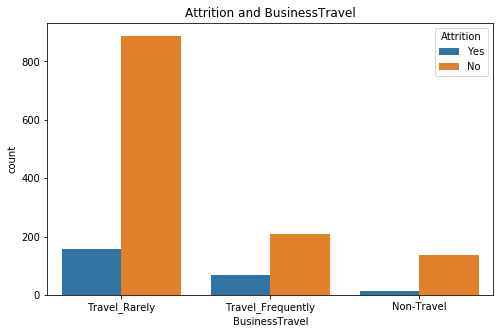

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=hr)
plt.title("Attrition and BusinessTravel")
plt.show()

Большинство сотрудников путешествуют по работе редко.

In [47]:
hr['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

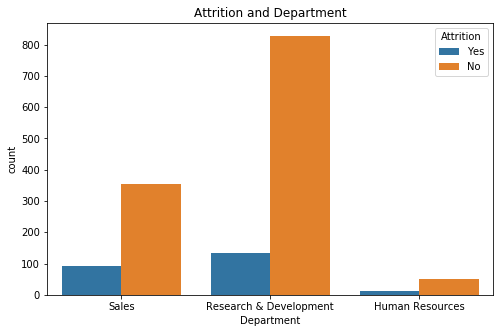

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=hr)
plt.title("Attrition and Department")
plt.show()

In [49]:
hr['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

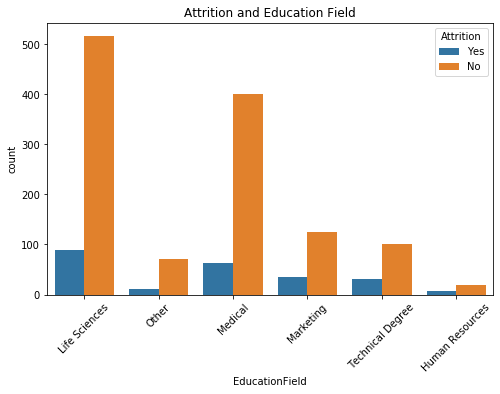

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=hr)
plt.title("Attrition and Education Field")
plt.xticks(rotation=45)
plt.show()

In [51]:
hr['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

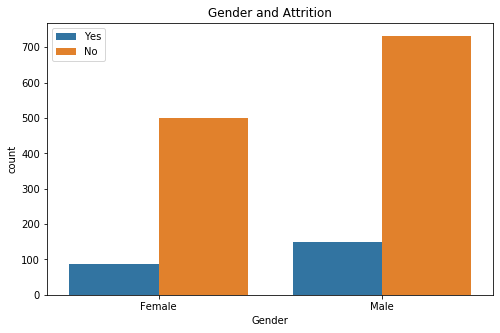

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Attrition', data=hr)
plt.title("Gender and Attrition")
plt.legend(loc='best')
plt.show()

Мужчины чаще страдают от истощения/усталости, чем женщины

In [53]:
hr['JobRole'].nunique()

9

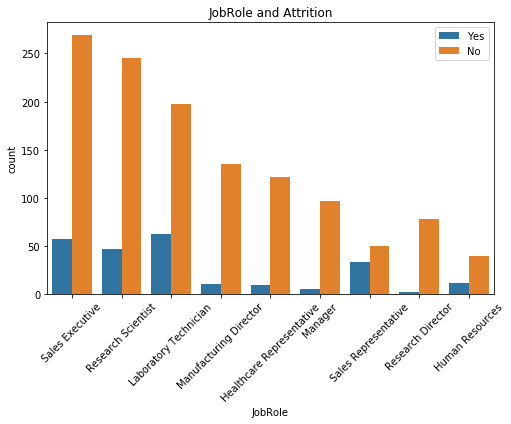

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=hr)
plt.title("JobRole and Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

Больше всего увольняются торговые представители, лаборанты и руководители отдела продаж.

In [55]:
hr['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

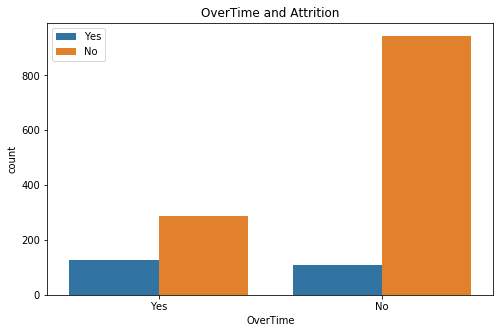

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverTime',hue='Attrition', data=hr)
plt.title("OverTime and Attrition")
plt.legend(loc='best')
plt.show()

При переработках повышаетсяя вероятность усталости/истощения

In [57]:
#посмотрим на пол тех, кто перерабатывает
pd.crosstab(hr['OverTime'], hr['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


Мужчины чаще работают сверхурочно

<b>Числовые параметры</b>

In [58]:
num_params = [feature for feature in hr.columns if hr[feature].dtype != 'O']
print(len(num_params))

26


In [59]:
hr[num_params].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


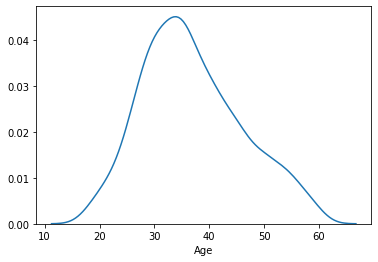

In [60]:
sns.distplot(hr['Age'],hist=False)
plt.show()

In [61]:
hr['Age'].nunique()

43

Возраст нормализован, возраст большинства сотрудников от 25 до 40 лет 

У нас есть некоторые числовые столбцы, которые закодированы для нас, это порядковые метки.

In [62]:
ordinal_params = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
hr[ordinal_params].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [63]:
hr['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

Больше всего бакалавров и магистров

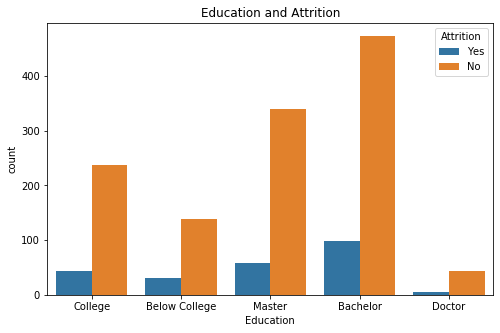

In [64]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(8,5))
sns.countplot(x=hr['Education'].map(edu_map), hue='Attrition', data=hr)
plt.title("Education and Attrition")
plt.show()

In [65]:
hr['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

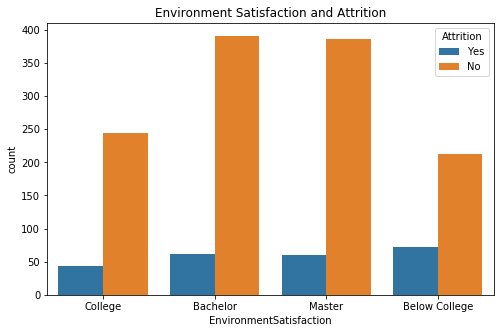

In [66]:
es_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(8,5))
sns.countplot(x=hr['EnvironmentSatisfaction'].map(edu_map), hue='Attrition', data=hr)
plt.title("Environment Satisfaction and Attrition")
plt.show()

In [67]:
hr['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

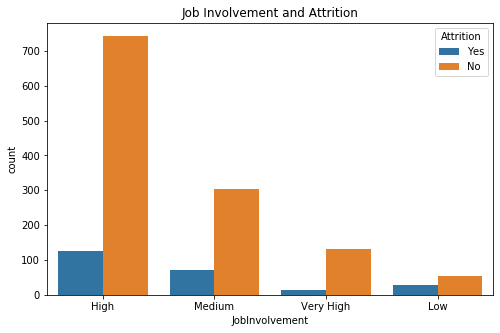

In [68]:
ji_map = {1 :'Low', 2: 'Medium', 3 :'High', 4 :'Very High'}
plt.figure(figsize=(8,5))
sns.countplot(x=hr['JobInvolvement'].map(ji_map), hue='Attrition', data=hr)
plt.title("Job Involvement and Attrition")
plt.show()

Серьезных корреляций не замечено.

In [69]:
hr['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

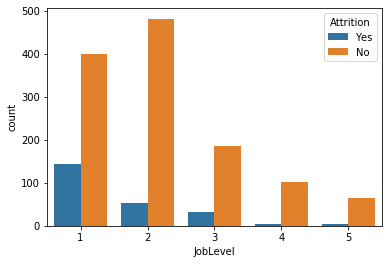

In [70]:
sns.countplot(x='JobLevel',hue='Attrition',data=hr)
plt.show()

In [71]:
num_params = [feature for feature in hr.columns if hr[feature].dtype != 'O' and feature not in ordinal_params]
print(len(num_params))

19


In [72]:
hr[num_params].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


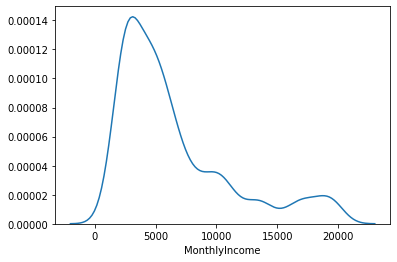

In [73]:
sns.distplot(hr['MonthlyIncome'],hist=False)
plt.show()

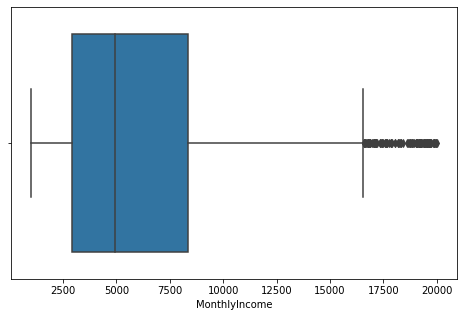

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(hr['MonthlyIncome'])
plt.show()

In [75]:
#корреляция возраста и дохода
trace = go.Scatter(x=hr['Age'],y=hr['MonthlyIncome'], mode="markers",
                   marker=dict(size = 8), line=dict(shape='spline'))
data=[trace]
layout = {"title":"Monthly Income and Age",
           "xaxis":{"title":"Age"},
           "yaxis":{"title":"MonthlyIncome"}
         }

iplot({"data":data, "layout":layout})

Доход увеличивается с возрастом 

In [76]:
hr['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

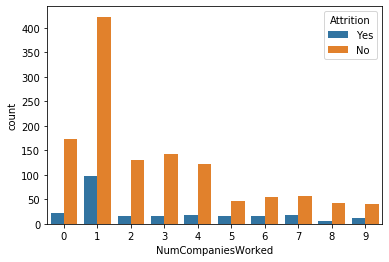

In [77]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=hr)
plt.show()

In [78]:
hr['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

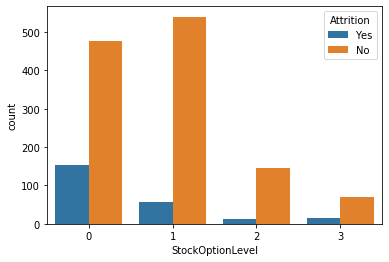

In [79]:
sns.countplot(x='StockOptionLevel',hue='Attrition',data=hr)
plt.show()

In [80]:
#удалим столбцы, которые не коррелируют с итоговым  
hr.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

In [81]:
hr[cat_params].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [82]:
#заменим ДА/НЕТ на 1 и 0
hr['Attrition'] = hr['Attrition'].replace({'No':0,'Yes':1})

In [83]:
hr['OverTime'] = hr['OverTime'].map({'No':0,'Yes':1})
hr['Gender'] = hr['Gender'].map({'Male':0,'Female':1})

In [84]:
#избавимся от категориальных 
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(hr[col].value_counts().index,0)}
    hr[col] = hr[col].map(map_dict)

In [85]:
#параметр Over18 не нужен
hr.drop('Over18',axis=1,inplace=True)

In [88]:
#посмотрим на уровень корреляции 
hr.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

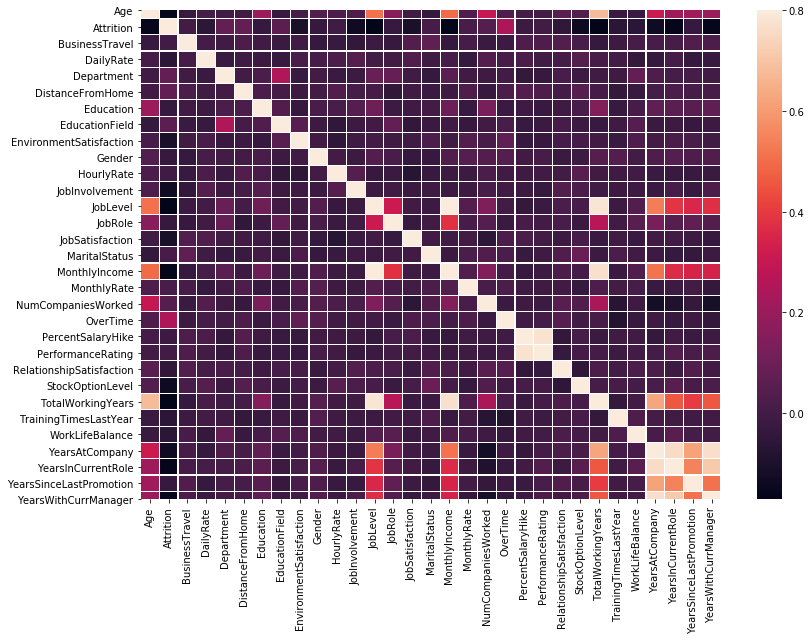

In [89]:
plt.figure(figsize=(13,9))
sns.heatmap(hr.corr(),vmax=0.8,linewidth=0.1)
plt.show()

In [90]:
x = hr.drop('Attrition',axis=1)
y = hr['Attrition']

In [91]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

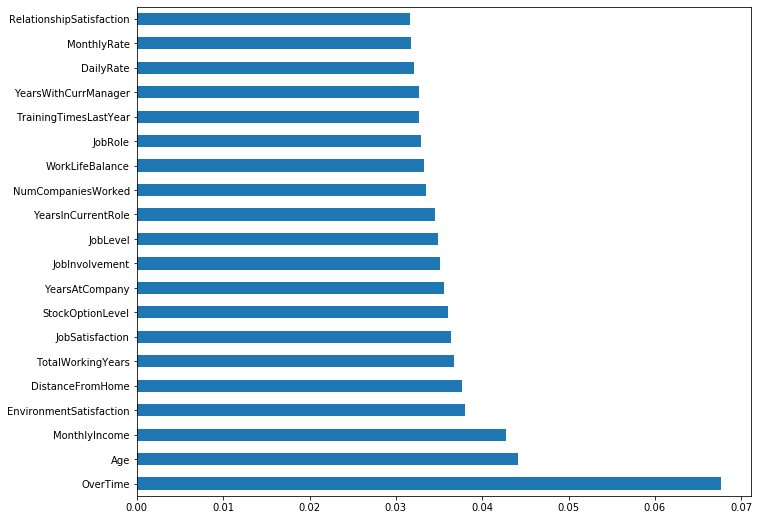

In [94]:
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

Самые влияющие факторы на увольнение:
- Переработки
- Возраст
- Зарплата 
- Удовлетворенность
- Расстояние до дома итд

In [95]:
#масштабируем функцию
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [96]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.044303
BusinessTravel              0.023523
DailyRate                   0.031680
Department                  0.022850
DistanceFromHome            0.038055
Education                   0.029053
EducationField              0.029529
EnvironmentSatisfaction     0.038779
Gender                      0.021978
HourlyRate                  0.031016
JobInvolvement              0.033670
JobLevel                    0.034696
JobRole                     0.032821
JobSatisfaction             0.034655
MaritalStatus               0.028677
MonthlyIncome               0.042664
MonthlyRate                 0.030217
NumCompaniesWorked          0.032358
OverTime                    0.066622
PercentSalaryHike           0.031081
PerformanceRating           0.014083
RelationshipSatisfaction    0.030978
StockOptionLevel            0.038203
TotalWorkingYears           0.040548
TrainingTimesLastYear       0.028972
WorkLifeBalance             0.035629
YearsAtCompany              0.037102
Y

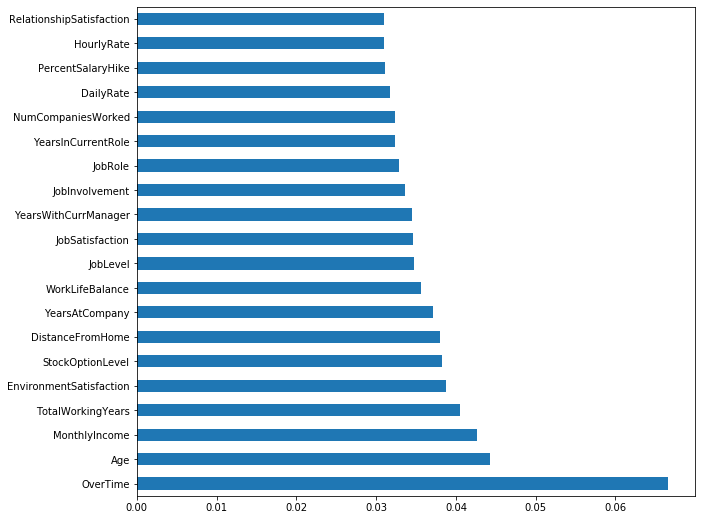

In [97]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

Для построения моделей разделим данные

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


Попробуем Логистическую регрессию, метод опорных векторов (svs,svm), k-ближайших соседей, дерево решений, случайный лес, линейный дискриминантный анализ, наивный байес. 

In [125]:
log_clf = LogisticRegression(max_iter=10000)
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lda_clf = LDA(n_components=1)
gnb_clf = GaussianNB()

In [126]:
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf, lda_clf, gnb_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8831521739130435
SVC   0.8695652173913043
KNeighborsClassifier   0.8396739130434783
DecisionTreeClassifier   0.7907608695652174
RandomForestClassifier   0.8804347826086957
LinearDiscriminantAnalysis   0.8940217391304348
GaussianNB   0.8070652173913043


Лучше всех показала себя логистическая регрессия, но значения слишком близки, поэтому построим ансамбль моделей.

In [127]:
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf),('lda',lda_clf),('gnb',gnb_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8804347826086957


In [128]:
#попробуем тоже самое с масштабированными данными
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [129]:
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf, lda_clf, gnb_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.904891304347826
SVC   0.8831521739130435
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.7744565217391305
RandomForestClassifier   0.8722826086956522
LinearDiscriminantAnalysis   0.8940217391304348
GaussianNB   0.8016304347826086


Результат стал лучше, попробуем ансамбль.

In [130]:
voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf),('lda',lda_clf),('gnb',gnb_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8967391304347826


Теперь попробуем более "продвинутые" алгоритмы: Adaboost и Xgboost

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [115]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.8722826086956522


In [116]:
print("training accuracy:",boost.score(x_train_scaled,y_train_scaled))
print("testing accuracy:",boost.score(x_test_scaled,y_test_scaled))

training accuracy: 0.837568058076225
testing accuracy: 0.8722826086956522


In [117]:
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8804347826086957


Результат получился чуть хуже, чем логистическая регрессия.

<b>Итог:</b>
- Проанализировали корреляцию данных и выявили наиболее влияющие на увольнение параметры
- Применили классические алгоритмы машинного обучения
- Использовали масштабирование данных
- Использовали ансамбли моделей
- Использовали более сложные реализации алгоритмов

Лучший результат дала логистическая регрессия на масштабированных данных: 0,905